In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
import PIL.Image
import numpy as np
rgba_image = PIL.Image.open('Flower\\hoa anh thảo\\hoa anh thảo01.png')
rgb_image = rgba_image.convert('RGB')
np_img = np.array(rgb_image)
np_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

C:\Users\khanh\AppData\Local\Temp\ipykernel_9068\346898151.py:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
c:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


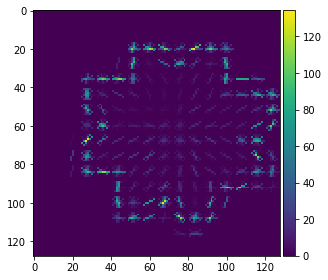

In [3]:
from skimage.feature import hog
from skimage.io import imread, imshow

image = imread('Flower\\hoa bướm\\hoa bướm01.png')
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
imshow(hog_image)

In [12]:
np_img.shape

(128, 128, 3)

In [198]:
def isExist(x, y, row_size, col_size):
    if x < 0 or y == col_size or y < 0 or x == row_size:
        return False
    return True

In [199]:
import math

In [200]:
class Gradient:
    def __init__(self, left=0, right=0, top=0, bottom=0):
        self.Gx = right - left
        self.Gy = top - bottom
        self.total_gradient = math.sqrt(self.Gx * self.Gx + self.Gy * self.Gy)
        self.angle = np.arctan2(self.Gy, self.Gx)
    
    def calculateGradient(image, row_size, col_size):
        gradient = []
        for row in range(row_size):
            gradient.append([])
            for col in range(col_size):
                gradient[row].append(Gradient())
                x_left = row
                y_left = col - 1
                x_right = row
                y_right = col + 1
                x_top = row - 1
                y_top = col
                x_bottom = row + 1
                y_bottom = col
                for i in range(3):
                # i = {
                #     0: 'red',
                #     1: 'green',
                #     2: 'blue',
                # }
                    if isExist(x_left, y_left, row_size, col_size):
                        left = image[x_left][y_left][i].astype(np.int32)
                    else:
                        left = 0
                    if isExist(x_right, y_right, row_size, col_size):
                        right = image[x_right][y_right][i].astype(np.int32)
                    else:
                        right = 0
                    if isExist(x_top, y_top, row_size, col_size):
                        top = image[x_top][y_top][i].astype(np.int32)
                    else:
                        top = 0
                    if isExist(x_bottom, y_bottom, row_size, col_size):
                        bottom = image[x_bottom][y_bottom][i].astype(np.int32)
                    else:
                        bottom = 0  
                    gradient_by_color = Gradient(left, right, top, bottom)
                    if gradient[row][col].total_gradient < gradient_by_color.total_gradient:
                        gradient[row][col].total_gradient = gradient_by_color.total_gradient
                        gradient[row][col].angle = gradient_by_color.angle
        return np.array(gradient)
    
    def __str__(self):
        return f"{self.total_gradient}, {self.angle}"

In [201]:
row_size, col_size = np_img.shape[0], np_img.shape[1]
gradient = Gradient.calculateGradient(np_img, row_size, col_size)

In [202]:
orientations=9
pixel_per_cell=(8,8)
cells_per_block=(2,2)

In [203]:
def getValue(g):
    return (g.total_gradient, g.angle)

In [204]:
def calculateHistogram(gradient, orientations, pixel_per_cell, row_size, col_size):
    histogram = []
    histogram_of_row = []
    row_start, col_start, row_end, col_end = 0, 0, pixel_per_cell[0], pixel_per_cell[1]
    pi_per_orientations = math.pi / orientations
    while(True):
        histogram_of_cell = [0 for i in range(orientations)]
        cell = gradient[row_start:row_end, col_start:col_end]
        #chuyển thành 1 chiều
        cell = np.ravel(cell)
        #chuyển thành mảng chứa 1 mảng total_gradient và 1 mảng chứa angle
        vfunc = np.vectorize(getValue)
        cell = vfunc(cell)
        pi_per_orientations = math.pi / 8
        for i in range(len(cell[0])):
            total_gradient = cell[0][i]
            angle = cell[1][i]
            angle_per_pi_per_orientations = angle / pi_per_orientations
            left_bin = int(angle_per_pi_per_orientations)
            left_angle = left_bin * pi_per_orientations
            right_angle = (left_bin + 1) * pi_per_orientations
            if angle_per_pi_per_orientations < orientations - 1:
                right_bin = left_bin + 1
            else:
                right_bin = 0
            histogram_of_cell[left_bin] += (right_angle - angle) / pi_per_orientations * total_gradient
            histogram_of_cell[right_bin] += (angle - left_angle) / pi_per_orientations * total_gradient
        histogram_of_row.append(histogram_of_cell)
        if col_end < col_size:
            col_start = col_end
            col_end = col_start + pixel_per_cell[1]
        else:
            histogram.append(histogram_of_row)
            histogram_of_row = []
            if row_end < row_size:
                row_start = row_end
                row_end = row_start + pixel_per_cell[0]
                col_start = 0
                col_end = pixel_per_cell[1]
            else:
                break
    return np.array(histogram)

In [205]:
histogram = calculateHistogram(gradient, orientations, pixel_per_cell, row_size, col_size)

In [206]:
histogram.shape

(16, 16, 9)

In [207]:
vector_features = []
row_block_size = histogram.shape[0]
col_block_size = histogram.shape[1]
row_cell_start, col_cell_start, row_cell_end, col_cell_end = 0, 0, cells_per_block[0], cells_per_block[1]
while(True):
    block = histogram[row_cell_start:row_cell_end, col_cell_start:col_cell_end]
    k = math.sqrt(np.sum(block * block))
    if k != 0:
        block = block / k
    vector_features.append(block)
    if col_cell_end < col_block_size:
        col_cell_start += 1
        col_cell_end += 1
    else:
        if row_cell_end < row_block_size:
            row_cell_start += 1
            row_cell_end += 1
            col_cell_start = 0
            col_cell_end = cells_per_block[1]
        else:
            break
vector_features = np.array(vector_features)
fd = vector_features.reshape(-1)
fd

array([0., 0., 0., ..., 0., 0., 0.])

In [208]:
fd.shape

(8100,)

In [4]:
from Feature import *

In [5]:
feature = Feature()
fd = feature.hog(np_img, orientations=9, pixel_per_cell=(8, 8), cells_per_block=(2,2))
fd

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
fd.shape

(8100,)

In [5]:
feature = Feature()

In [5]:
print(feature)

color : (0,)
shape : (0,)
texture : (0,)


In [6]:
gray_image = feature.rbgToGray(np_img)
gray_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
gradient = Gradient.calculateGradient(np_img)
gradient.shape

(128, 128)

In [7]:
histogram = feature.calculateHistogramOfGradient(gradient, orientations=9, pixel_per_cell=(8,8))
histogram.shape

(16, 16, 9)

In [5]:
a = np.array ([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a = np.ravel(a)
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

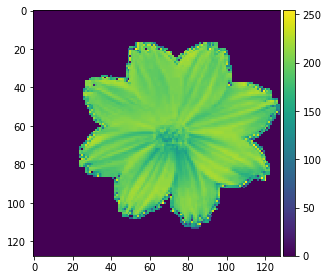

In [10]:
imshow(gray_image)

In [13]:
gradient = Gradient()
gradient = Gradient.calculateGradient(np_img)
image = np.empty((128, 128), dtype=float)
for i in range(128):
    for j in range(128):
        image[i][j] = getValue(gradient[i][j])[0]
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

c:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


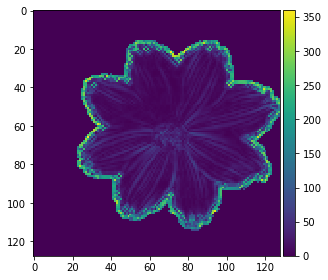

In [23]:
imshow(image)

In [25]:
a = np.empty((128, 128))
a.dtype

dtype('float64')

In [11]:
lbp_values = feature.calculateLbp(gray_image)
lbp_values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

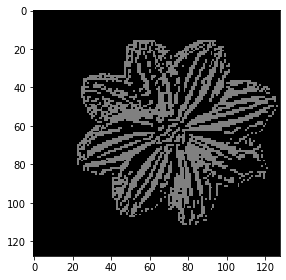

In [12]:
imshow(lbp_values)

In [8]:
feature.hog(np_img, orientations=9, pixel_per_cell=(8,8), cells_per_block=(2,2))
feature.shape

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
feature.lbp(np_img, orientations=8, pixel_per_cell=(8,8), cells_per_block=(2,2))
feature.texture

array([0.5, 0. , 0. , ..., 0. , 0. , 0. ])

In [9]:
int_hog = hog.astype(np.int32)
a = np.unique(int_hog)
a

array([0, 1])

In [5]:
print(feature)

color : (0,)
shape : (8100,)
texture : (0,)


In [7]:
fd = feature.hog(gray_image, orientations=9, cells_per_block=(2, 2), pixel_per_cell=(8,8))
fd

ok


array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
a = np.array ([[1.2, 3.4, 5.6], [7.8, 9.0, 10.1]])
a.shape

(2, 3)

In [11]:
a = a.reshape(2,3,1)
a

array([[[ 1.2],
        [ 3.4],
        [ 5.6]],

       [[ 7.8],
        [ 9. ],
        [10.1]]])

In [10]:
a.shape

(2, 3)

In [33]:
from Feature import *
import json 
from PIL import Image
import numpy as np

In [42]:
with open('data.json', 'r') as f:
    data = json.load(f)
feature = Feature()

In [85]:
image = Image.open('test\\hoa thủy tiên.png').resize((128, 128))
image = np.array(image)

color_feature_of_test = feature.color_histogram(image)
hog_feature_of_test = feature.hog(image)

list_distance = []

In [86]:
for record in data['data']:
    label = record['label']
    color_feature_of_train = np.array(record['color_feature'])
    hog_feature_of_train = np.array(record['hog_feature'])
    
    distance_color = feature.distanceEuclidean(color_feature_of_test, color_feature_of_train)
    distance_hog = feature.distanceEuclidean(hog_feature_of_test, hog_feature_of_train)
    distance = distance_color + distance_hog
    distance = distance_hog
    list_distance.append((label, distance))

list_distance.sort(key=lambda x: x[1])
list_distance = list_distance[:5]

In [87]:
list_distance

[('hoa bướm', 14.014643990177941),
 ('hoa hướng dương', 14.15463987549102),
 ('hoa đồng tiền', 14.2266819525383),
 ('hoa đồng tiền', 14.304744960842667),
 ('hoa hướng dương', 14.44026240889515)]